In [1]:
from cutting_plane import solve_problem
from helpers import plot_intervals, swiss_nsf
from generate_intervals import generate_uniform_intervals, generate_fixedwidth_intervals

import matplotlib.pyplot as plt

# Example 1

In [2]:
x = [16, 15, 14.5, 12, 10.75, 10.5, 8.2, 7.5, 6.5, 5.5]
w = 1 
I = [(y-w, y+w) for y in x]

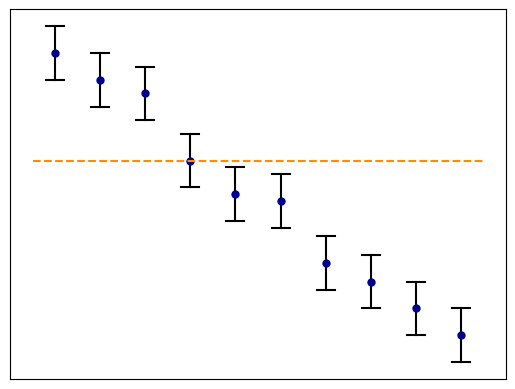

In [3]:
ax = plot_intervals(I, x=x, k=4, plot_swiss_nsf=True, show_axes=False)

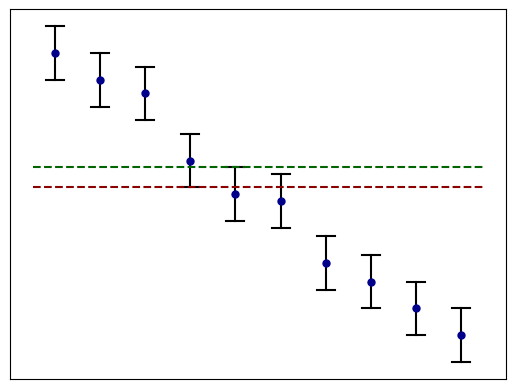

In [4]:
ax = plot_intervals(I, x=x, k=4, plot_algo=True, show_axes=False)

In [5]:
solve_problem(I, 4)

(array([1.        , 1.        , 1.        , 0.33333333, 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ]),
 3.3333333333333335,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 4.100799560546875e-05,
   'monotonicity_constraints_setup': 3.0994415283203125e-05,
   'optimization_loop_time': 6.175041198730469e-05,
   'total_time': 0.04002499580383301,
   'init_prune_time': 8.177757263183594e-05}})

In [6]:
swiss_nsf(I, x, 4)

[1, 1, 1, 1.0, 0, 0, 0, 0, 0, 0]

# Example 2

In [7]:
I = [
 (8, 9.3),
 (5.4, 8.5),
 (5.3, 7.5),
 (4.7, 6.3),
 (3,6),
 (2, 6),
 (0., 4.8),
 (0, 2),
 (0, 1.5),
 (0, 1)
]

x = [(i[1] + i[0])/2. for i in I]

In [8]:
# sort intervals by LCB 
I = sorted(I, key=lambda interval: interval[0], reverse=True)
x = [(interval[1] + interval[0]) / 2. for interval in I]

<Axes: >

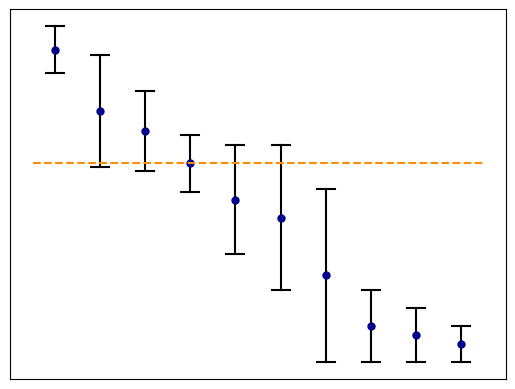

In [9]:
plot_intervals(I, x=x, k=4, plot_swiss_nsf=True, show_axes=False)

In [10]:
solve_problem(I, 4)

(array([1.  , 0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  ]),
 2.5,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 4.792213439941406e-05,
   'monotonicity_constraints_setup': 0.00010323524475097656,
   'optimization_loop_time': 5.0067901611328125e-05,
   'total_time': 0.0051038265228271484,
   'init_prune_time': 3.3855438232421875e-05}})

## Monotonicity Example

In [2]:
I = [
    (9, 10),
    (5, 9.7),
    (4,8),
    (4, 8)
]

x = [(i[1] + i[0])/2. for i in I]

<Axes: >

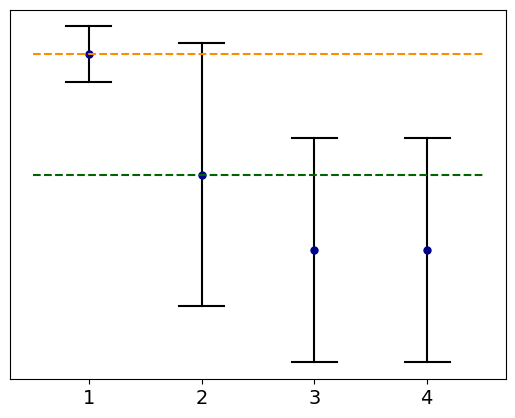

In [3]:
plot_intervals(I, x=x, k=[1,2], plot_swiss_nsf=True, show_axes=True, hide_y=True)